## Sprint I - EDA y Limpieza

SPRINT 2 - 9 DE FEBRERO

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../datos/bikes.csv", index_col = 0)

### Columnas:

- instant: record index
- dteday : date
- season : season (spring, summer, autumn, winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
# Ponemos instant, que es el index del alquiler
df = df.set_index("instant")
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.groupby(["weathersit"])["registered"].sum()

weathersit
1    1811606
2     825313
3      33974
Name: registered, dtype: int64

In [5]:
lista_holiday = ["01-01-2018", "16-01-2018", "20-02-2018", "31-03-2018", "29-05-2018", "04-07-2018", "05-07-2018", "28-07-2018", "04-09-2018", "10-11-2018", "23-11-2018", "24-11-2018", "24-12-2018", "25-12-2018", "31-12-2018", "01-01-2019", "16-01-2019", "20-02-2019", "31-03-2019", "29-05-2019", "04-07-2019", "05-07-2019", "28-07-2019", "04-09-2019", "10-11-2019", "28-11-2019", "29-11-2019", "24-12-2019", "25-12-2019", "31-12-2019"]

In [6]:
df["holiday"] = df["dteday"].isin(lista_holiday)

In [7]:
df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
53,22-02-2018,spring,0,2,False,2,1,1,7.471102,9.30165,57.7778,13.110761,74,1376,1450
570,24-07-2019,autumn,1,7,False,2,1,1,30.784153,35.32250,65.5000,14.167418,1140,6452,7592
336,02-12-2018,winter,0,12,False,5,1,1,12.880847,16.57165,62.5833,6.750518,268,3672,3940
600,23-08-2019,autumn,1,8,False,4,1,1,28.529153,31.85040,63.5833,5.667919,1363,6402,7765
311,07-11-2018,winter,0,11,False,1,1,1,16.195000,20.04355,75.8750,3.834075,373,3662,4035


In [8]:
df["holiday"] = np.where(df["holiday"] == False, 0, 1)

In [9]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df = df.drop(columns = ["weekday"], axis = 1)

In [11]:
df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 85.5+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.041096,0.198648,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
df.groupby(["yr"])["registered"].sum()

yr
0     995851
1    1675042
Name: registered, dtype: int64

***

### DATETIME

In [17]:
#df["yr"] = df["dteday"].str.split("-", expand=True)[2]

In [18]:
df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
 # Cambiamos la columna dteday a datetime
df.dteday = pd.to_datetime(df.dteday)

In [20]:
df["season"].unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

In [21]:
# Como las estaciones no coinciden con la fecha, creamos una función para ponerlo bien
def season_of_date(col):
    year= col.year
    seasons = {'spring': pd.date_range(start= '21-03-' + str(year), end= '20-06-' + str(year) ),
               'summer': pd.date_range(start= '21-06-' + str(year), end= '22-09-' + str(year) ),
               'autumn': pd.date_range(start= '23-09-' + str(year), end= '20-12-' + str(year))}
    if col in seasons['spring']:
        return 'spring'
    if col in seasons['summer']:
        return 'summer'
    if col in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [22]:
# Pasamos la funcion
df["season"] = df["dteday"].apply(season_of_date)

In [23]:
df.groupby(["season"])["registered"].sum()

season
autumn    685299
spring    694701
summer    784770
winter    506123
Name: registered, dtype: int64

In [24]:
df.sample(5)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
437,2019-03-13,winter,1,3,0,1,1,23.165000,27.14645,61.7500,15.875650,762,5085,5847
251,2018-08-09,summer,0,9,0,1,3,25.990433,27.76805,93.9565,12.914116,153,1689,1842
238,2018-08-26,summer,0,8,0,1,1,28.700000,32.98665,76.1250,5.625488,768,3893,4661
316,2018-12-11,autumn,0,11,0,0,1,14.623347,17.89710,55.2917,14.208154,1275,2792,4067
384,2019-01-19,winter,1,1,0,1,1,7.790000,9.50190,49.7500,14.750586,130,3162,3292


In [25]:
df["weekday"] = df["dteday"].dt.dayofweek 

In [26]:
df["mnth"] = df["dteday"].dt.month

In [27]:

df.head(5)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
2,2018-02-01,winter,0,2,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,3
3,2018-03-01,winter,0,3,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
4,2018-04-01,spring,0,4,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,6
5,2018-05-01,spring,0,5,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [28]:
df["yr"].unique()

array([0, 1])

In [29]:
df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [30]:
df["holiday"].unique()

array([1, 0])

In [31]:
df.groupby(["mnth"])["registered"].sum()

mnth
1     162161
2     165430
3     211562
4     219291
5     243836
6     253636
7     252535
8     256125
9     262686
10    244987
11    210748
12    187896
Name: registered, dtype: int64

In [32]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'weekday'],
      dtype='object')

In [33]:
df["weekday"].unique()

array([0, 3, 6, 1, 4, 2, 5])

In [34]:
df["workingday"].unique()

array([0, 1])

In [35]:
df["weathersit"].unique() # No tenemos 4 (tormenta, lluvia fuerte....)

array([2, 1, 3])

## Festivos:

- 01-01 New Years Day January  1 
- 16-01 Martin Luther King’s Birthday January 16 
- 13-02 Lincolns Birthday February 
- 20-02 President’s Day February 20
- 31-03 Cesar Chavez’ Birthday March 31
- 29-05 Memorial Day May 29
- 04-07 Independence Day July 4
- 05-07 Bloody Thursday July 5
- 28-07 Harry Bridges’ Birthday July 28
- 04-09 Labor Day September 4
- 10-11 Veterans’ Day November 10
- 23-11 Thanksgiving Day November 23
- 24-11 Day After Thanksgiving November 24
- 24-12 Christmas Eve December 24
- 25-12 Christmas Day December 25
- 31-12 New Year’s Eve December 31

In [36]:
df["weekday"] = df["weekday"] + 1

In [37]:
df.groupby(["weekday"])["registered"].sum()

weekday
1    332420
2    369562
3    384101
4    410572
5    407840
6    405069
7    361329
Name: registered, dtype: int64

In [38]:
df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,2018-02-01,winter,0,2,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,4
3,2018-03-01,winter,0,3,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,4
4,2018-04-01,spring,0,4,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,7
5,2018-05-01,spring,0,5,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2


In [39]:
def workingday(col1, col2):
    if col1 == 1 or col2 == 6 or col2 == 7:
        return 0
    else:
        return 1

**0: Festivo o fin de semana (no se trabaja).**

**1: Se trabaja.**

In [40]:
df["workingday"] = df.apply(lambda col: workingday(col["holiday"], col["weekday"]), axis = 1)

In [41]:
df.sample(6)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
211,2018-07-30,summer,0,7,0,1,1,32.970847,36.42685,46.5833,11.291979,1559,2916,4475,1
725,2019-12-26,winter,1,12,0,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441,4
669,2019-10-31,autumn,1,10,0,1,2,14.657500,18.05500,66.6667,11.166689,419,5147,5566,4
221,2018-09-08,summer,0,9,0,0,1,31.775000,36.20605,57.0417,10.125107,907,3695,4602,6
713,2019-12-14,autumn,1,12,0,0,1,11.548347,14.70960,64.2917,8.792343,429,5182,5611,6
49,2018-02-18,winter,0,2,0,0,1,21.388347,25.59915,51.6667,17.749975,579,2348,2927,7


In [42]:
df.groupby(["workingday"])["registered"].sum()

workingday
0     826197
1    1844696
Name: registered, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   workingday  730 non-null    int64         
 6   weathersit  730 non-null    int64         
 7   temp        730 non-null    float64       
 8   atemp       730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
 14  weekday     730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 91.2+ 

***
### OUTLIERS

In [44]:
lista_columnas = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

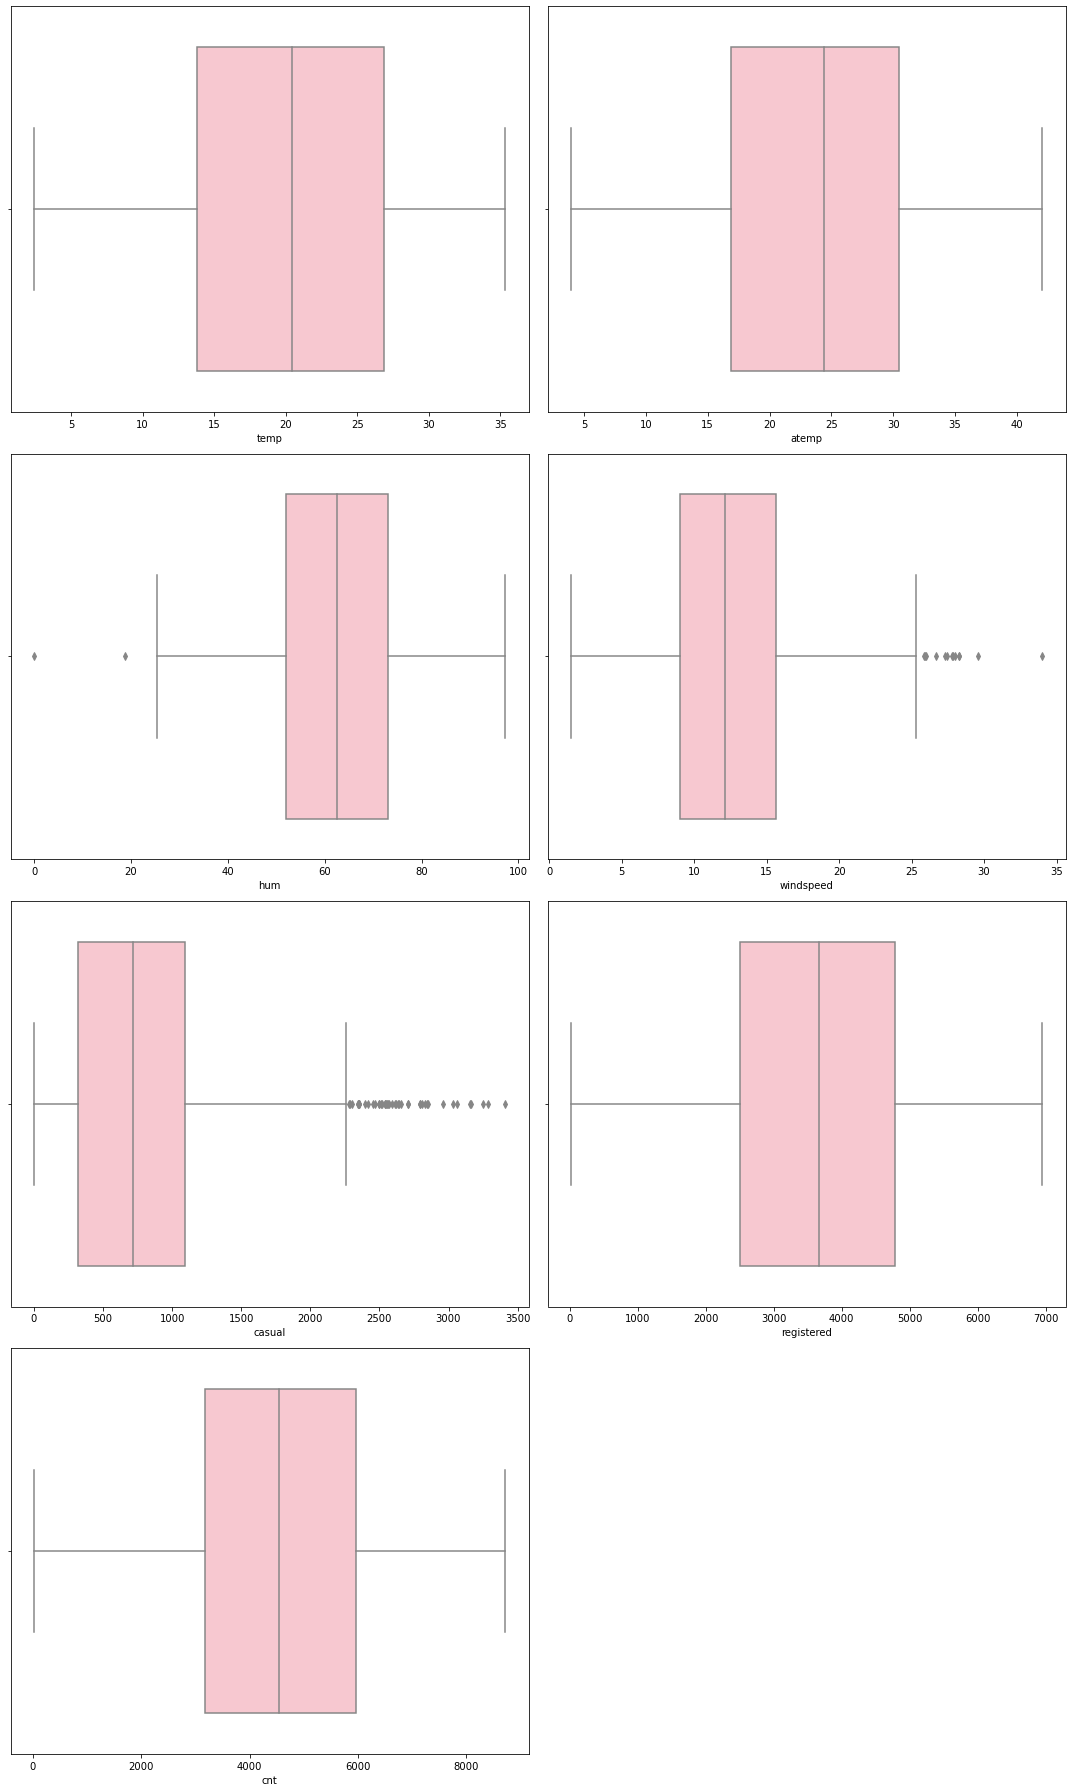

In [45]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))
axes = axes.flat

for i, col in enumerate(lista_columnas):
    sns.boxplot(x = df[col], data = df, ax=axes[i], color = "pink")
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show();

In [46]:
df.drop(columns=["dteday"], inplace=True, axis=1)

- Nos quedamos con los usuarios registrados porque presentan menos número de outliers y es más fácil trabajar con estos datos.

In [47]:
df.to_csv("../datos/bikes_clean.csv")

In [48]:
df.tail()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,
726,winter,1,12,0,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,5
727,winter,1,12,0,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,6
728,winter,1,12,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,7
729,winter,1,12,0,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,1
730,winter,1,12,1,0,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729,2
